# MONET-analysis dev 

First lets just import the driver to see how it happens and so we can play around with it a little 

In [1]:
import sys
sys.path.append('../../')
import driver

/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monet_default/lib/python3.6/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


Please install h5py to open files from the Amazon S3 servers.
Please install h5netcdf to open files from the Amazon S3 servers.


### Driver class

Now lets create an instance of the python driver analysis class. It consists of 4 main parts; model instances, observation instances, a paired instance of both.  This will allow us to move things around the plotting function for spatial and overlays and more complex plots.

In [2]:
an = driver.analysis()

### Control File

set the yaml control file and begin by reading the file

In [3]:
an.control = '../yaml/control_wrfchem.yaml'
an.read_control() # control='control.yaml')
an.control_dict

{'analysis': {'start_time': '2019-08-02-12:00:00',
  'end_time': '2019-08-03-12:00:00',
  'output_dir': '/scratch2/BMC/rcm1/rhs/wrfchem/processed/run_CONUS_fv19_BEIS_1.0xISO_RACM_v4.2.2_racm_vcp_noI/0802',
  'debug': True},
 'model': {'wrfchem_v4.2': {'files': '/scratch2/BMC/rcm1/rhs/wrfchem/runs_firex/run_CONUS_fv19_BEIS_1.0xISO_RACM_v4.2.2_racm_vcp_noI/Output/0802/*',
   'mod_type': 'wrfchem',
   'mod_kwargs': {'mech': 'racm_esrl_vcp'},
   'radius_of_influence': 12000,
   'mapping': {'airnow': {'co': 'CO',
     'no2': 'NO2',
     'no': 'NO',
     'o3': 'OZONE'}},
   'projection': 'None',
   'plot_kwargs': {'color': 'dodgerblue', 'marker': '^', 'linestyle': ':'}}},
 'obs': {'airnow': {'use_airnow': True,
   'filename': '/scratch2/BMC/rcm1/rhs/MONET/MELODIES-MONET/melodies_monet/data/AIRNOW_20190801_20190831.nc',
   'obs_type': 'pt_sfc',
   'variables': {'PM2.5': {'unit_scale': 1,
     'unit_scale_method': '*',
     'nan_value': -1.0,
     'ylabel_plot': 'PM2.5 (ug/m3)',
     'ty_scale

### Loading the model data 

driver will automatically loop through the "models" found in the model section of the yaml file and create an instance of the driver.model class for each that includes the label, mapping information, and xarray object as well as the filenames.  Note it can open multiple files easily by including hot keys 

In [4]:
an.open_models()

wrfchem_v4.2
{'files': '/scratch2/BMC/rcm1/rhs/wrfchem/runs_firex/run_CONUS_fv19_BEIS_1.0xISO_RACM_v4.2.2_racm_vcp_noI/Output/0802/*', 'mod_type': 'wrfchem', 'mod_kwargs': {'mech': 'racm_esrl_vcp'}, 'radius_of_influence': 12000, 'mapping': {'airnow': {'co': 'CO', 'no2': 'NO2', 'no': 'NO', 'o3': 'OZONE'}}, 'projection': 'None', 'plot_kwargs': {'color': 'dodgerblue', 'marker': '^', 'linestyle': ':'}}
/scratch2/BMC/rcm1/rhs/wrfchem/runs_firex/run_CONUS_fv19_BEIS_1.0xISO_RACM_v4.2.2_racm_vcp_noI/Output/0802/*


In [5]:
an.models

{'wrfchem_v4.2': <driver.model at 0x7fa174ea4390>}

In [6]:
an.models['wrfchem_v4.2'].obj

<xarray.Dataset>
Dimensions:        (time: 31, x: 440, y: 284, z: 50)
Coordinates:
    longitude      (y, x) float32 -122.3 -122.2 -122.1 ... -60.68 -60.52 -60.37
    latitude       (y, x) float32 21.19 21.22 21.24 21.27 ... 50.28 50.24 50.2
  * time           (time) datetime64[ns] 2019-08-02 ... 2019-08-03T06:00:00
Dimensions without coordinates: x, y, z
Data variables:
    no2            (time, z, y, x) float32 0.01331 0.01339 ... 0.3504 0.3504
    co             (time, z, y, x) float32 74.85 74.85 74.91 ... 69.99 69.99
    o3             (time, z, y, x) float32 30.0 30.0 ... 2.727e+03 2.727e+03
    no             (time, z, y, x) float32 0.003643 0.003673 ... 0.0002108
    pres_pa_mid    (time, z, y, x) float32 1.013e+05 1.013e+05 ... 5.584e+03
    alt_msl_m_mid  (time, z, y, x) float32 11.38 11.38 ... 2.031e+04 2.031e+04
    temperature_k  (time, z, y, x) float32 296.6 296.5 296.4 ... 221.2 221.2
    alt_agl_m_mid  (time, z, y, x) float32 11.39 11.39 ... 2.03e+04 2.03e+04
    surfpres_pa    (time, y, x) float32 1.015e+05 1.015e+05 ... 1.009e+05
Attributes:
    TRUELAT1:                  33.0
    TRUELAT2:                  45.0
    MOAD_CEN_LAT:              39.617638
    STAND_LON:                 -97.0
    MAP_PROJ:                  1
    CEN_LAT:                   39.617638
    CEN_LON:                   -97.77487
    proj4_srs:                 +proj=lcc +lat_1=33.0 +lat_2=45.0 +lat_0=39.61...
    mapping_tables_to_airnow:  {'OZONE': 'o3', 'PM2.5': 'PM2_5_DRY', 'PM10': ...

In [7]:
#All the info in the model class can be called here.
print(an.models['wrfchem_v4.2'].label)
print(an.models['wrfchem_v4.2'].mapping)

wrfchem_v4.2
{'airnow': {'co': 'CO', 'no2': 'NO2', 'no': 'NO', 'o3': 'OZONE'}}


In [8]:
#All the info in the analysis class can also be called.
print(an.start_time)
print(an.end_time)

2019-08-02 12:00:00
2019-08-03 12:00:00


### Open Obs

Now for monet-analysis we will open preprocessed data in either netcdf icartt or some other format.  We will not be retrieving data like monetio does for some observations (ie aeronet, airnow, etc....).  Instead we will provide utitilies to do this so that users can add more data easily.

Like models we list all obs objects in the yaml file and it will loop through and create driver.observation instances that include the model type, file, objects (i.e. data object) and label  

In [9]:
an.open_obs()

In [10]:
#All the info in the observation class can also be called.
an.obs['airnow'].obj

<xarray.Dataset>
Dimensions:     (time: 2163, x: 3790, y: 1)
Coordinates:
  * x           (x) int64 0 1 2 3 4 5 6 7 ... 3783 3784 3785 3786 3787 3788 3789
  * time        (time) datetime64[ns] 2019-08-01 ... 2019-08-31T00:30:00
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    siteid      (y, x) object ...
Dimensions without coordinates: y
Data variables: (12/30)
    BARPR       (time, y, x) float64 ...
    BC          (time, y, x) float64 ...
    CO          (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    NO          (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    NO2         (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    NO2Y        (time, y, x) float64 ...
    ...          ...
    cmsa_name   (y, x) float64 ...
    msa_code    (y, x) float64 ...
    msa_name    (y, x) object ...
    state_name  (y, x) object ...
    epa_region  (y, x) object ...
    time_local  (time, y, x) datetime64[ns] ...
Attributes:
    title:         
    format:        NetCDF-4
    date_created:  2021-06-07

In [11]:
#This just pairs the data
an.pair_data()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s


Reference std: 189.36850984473284
Reference std: 8.021482790978691
Reference std: 7.8037052688328945
Reference std: 16.75977698892111


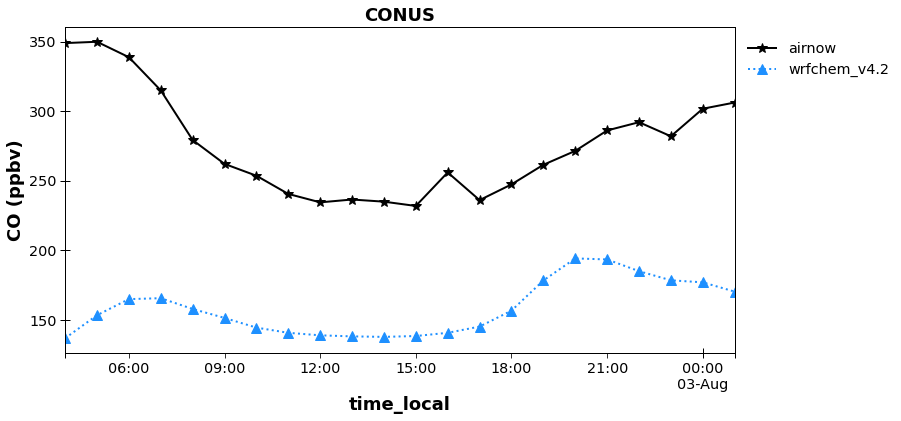

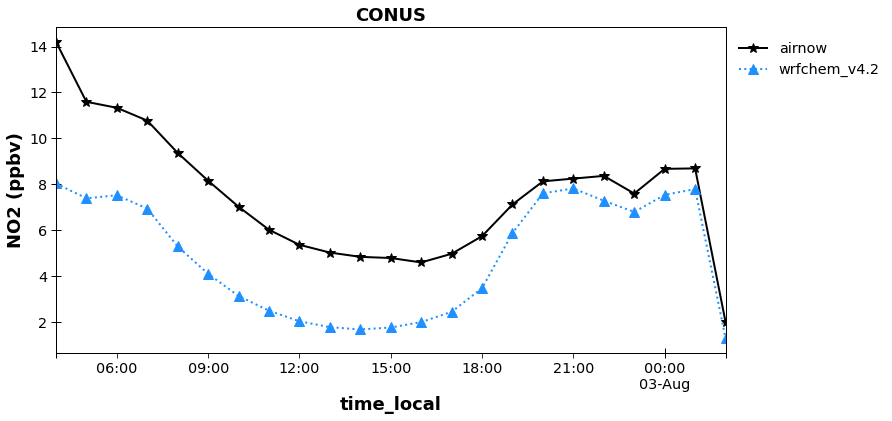

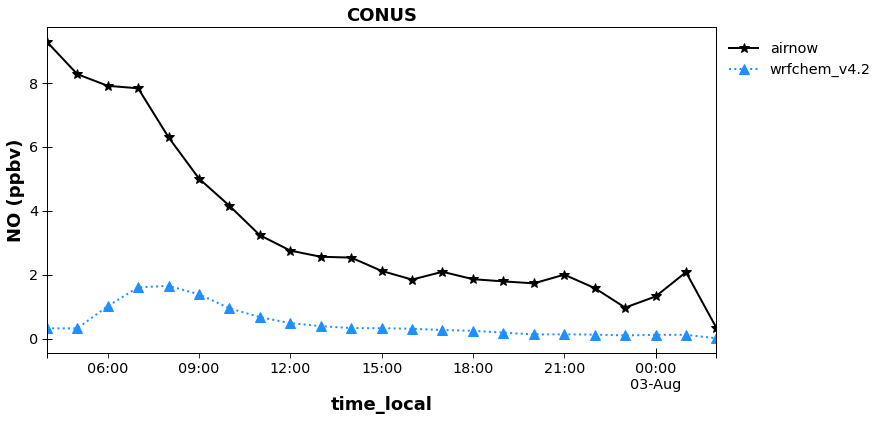

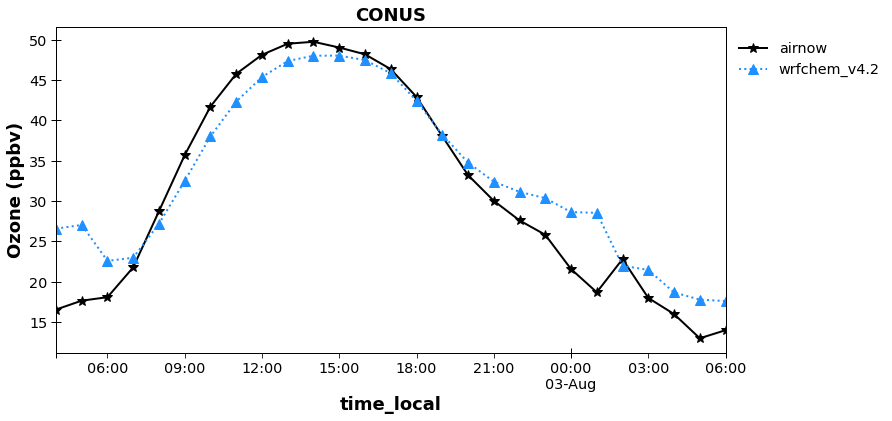

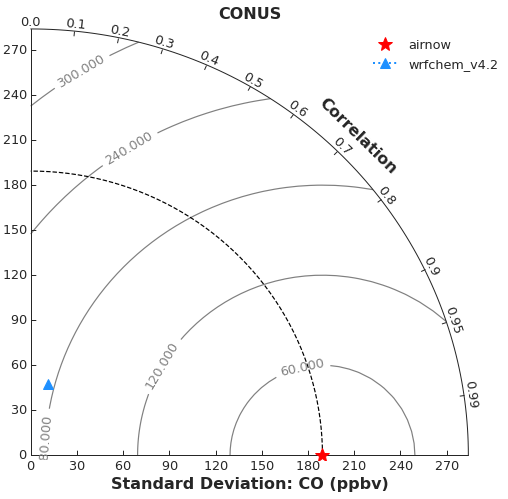

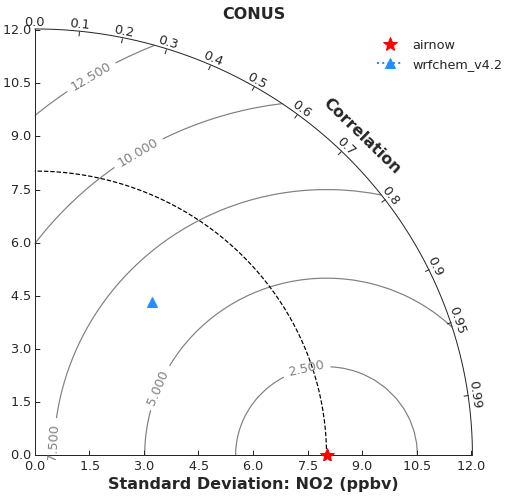

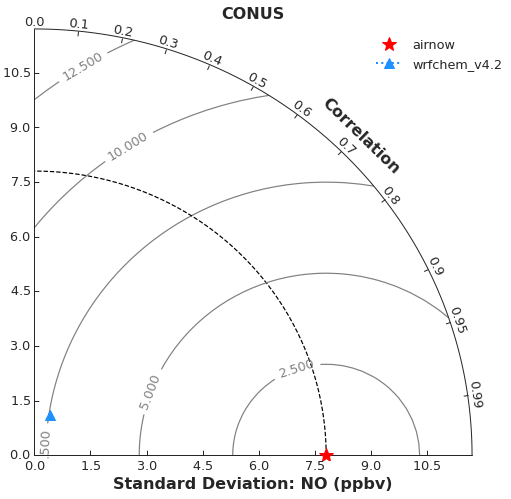

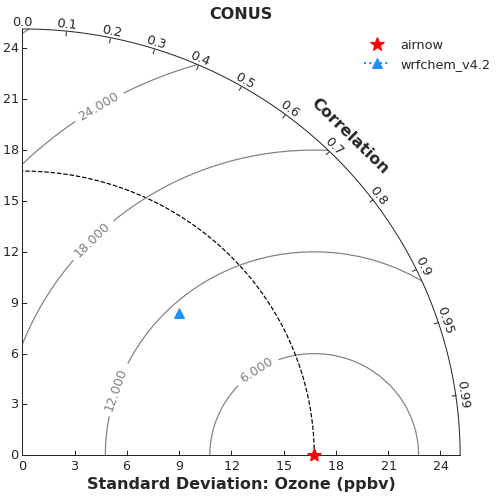

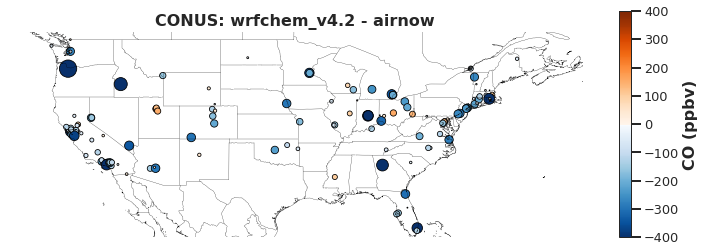

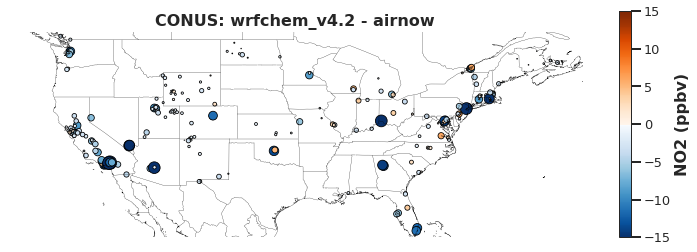

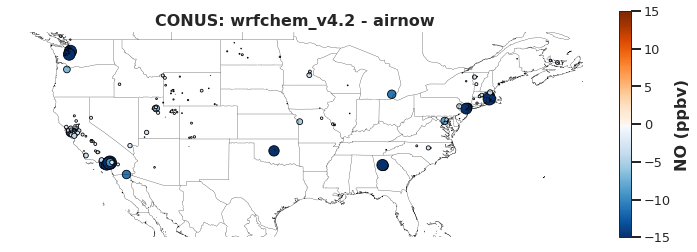

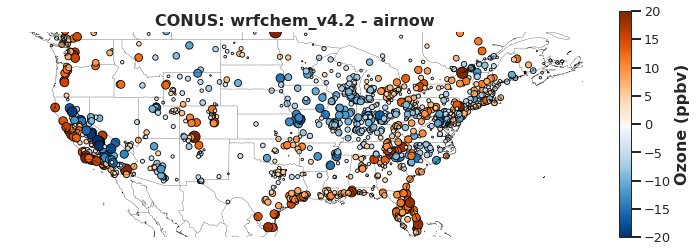

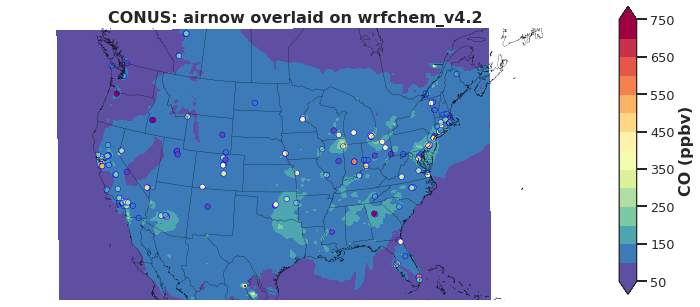

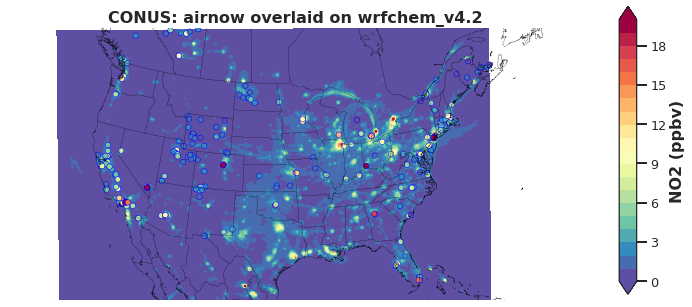

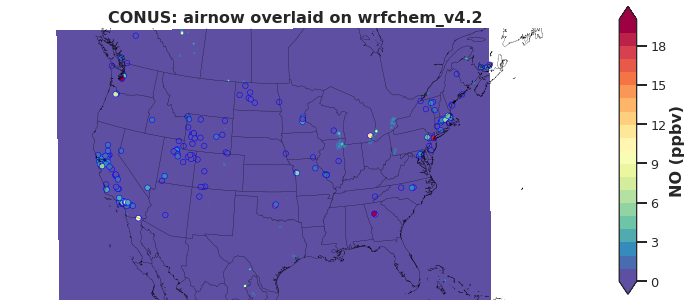

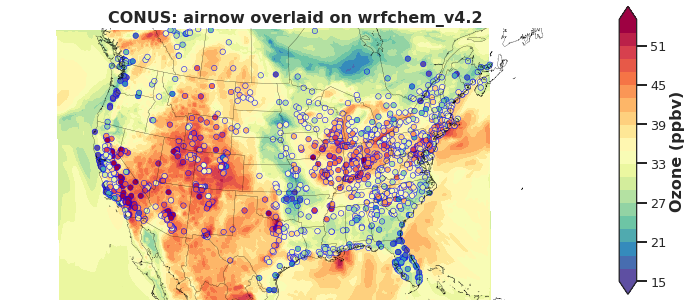

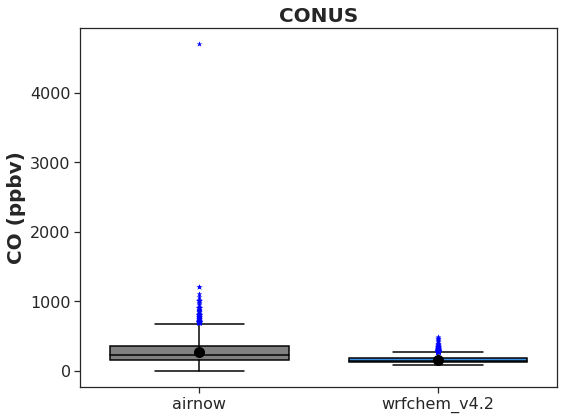

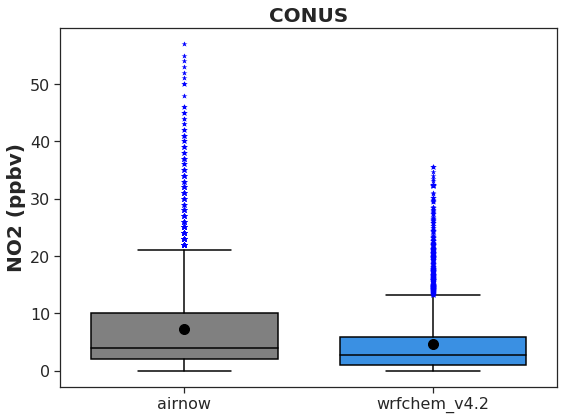

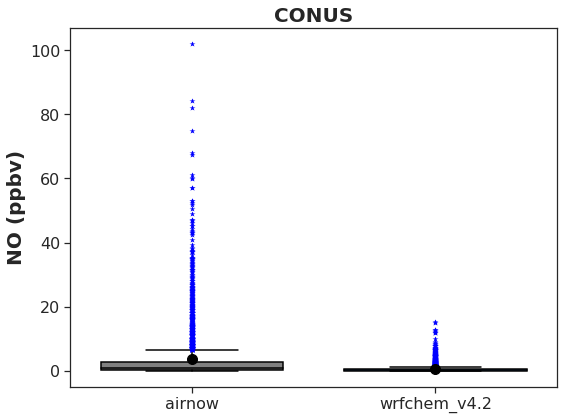

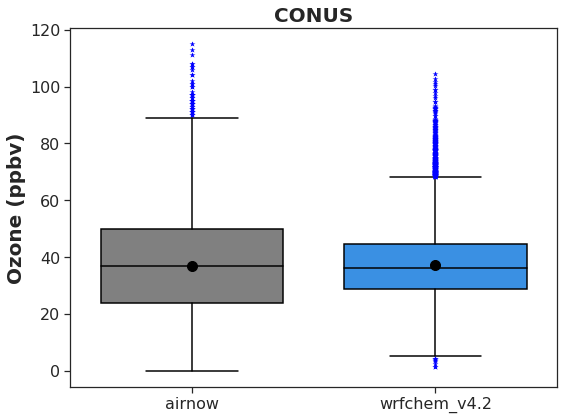

In [12]:
#And this generates all the plots.
an.plotting()

In [13]:
#Calculate stats
an.stats()                                         